In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import os
from pathlib import Path
from statsmodels.miscmodels.ordinal_model import OrderedModel


In [2]:
df = pd.read_csv('jobfair_train.csv',dtype={'dynamic_payment_segment':'category',
                                            'registration_country':'category',
                                            'registration_platform_specific':'category',
                                            })
df_test = pd.read_csv('jobfair_test.csv',dtype={'dynamic_payment_segment':'category',
                                            'registration_country':'category',
                                            'registration_platform_specific':'category',
                                            })
# df_plot = df[['cohort_season', 'avg_age_top_11_players', 'avg_stars_top_11_players',
#        'avg_stars_top_14_players', 'avg_training_factor_top_11_players',
#        'days_active_last_28_days', 'league_match_watched_count_last_28_days',
#        'session_count_last_28_days', 'playtime_last_28_days',
#        'league_match_won_count_last_28_days', 'training_count_last_28_days',
#        'global_competition_level', 'tokens_spent_last_28_days', 'tokens_stash',
#        'rests_stash', 'morale_boosters_stash',
#        'league_rank_simple']]
df.describe()


,season,club_id,league_id,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,league_match_watched_count_last_28_days,session_count_last_28_days,playtime_last_28_days,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
count,55314.0,5.531400e+04,5.531400e+04,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,5.531400e+04,55314.000000,55314.000000,37763.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000
mean,173.0,1.210977e+07,2.909804e+06,23.409372,23.718661,4.533516,4.344776,0.584372,12.357089,3.623170,63.432169,2.955178e+07,12.411813,61.107694,3.901014,121.393897,113.133077,283.083523,307.085964,7.500000
std,0.0,3.384016e+06,2.102140e+03,42.009274,2.206240,1.204753,1.177068,0.178090,11.849102,5.906055,101.831670,5.233892e+07,6.403013,188.288285,2.625576,842.775529,3183.550398,789.250959,823.362486,4.031165
min,173.0,2.750000e+02,2.904743e+06,1.000000,18.000000,1.451697,1.354905,-1.287736,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,-4975.000000,-169.000000,0.000000,1.000000
25%,173.0,1.151105e+07,2.907961e+06,2.000000,22.000000,3.691136,3.500062,0.479571,1.000000,0.000000,1.000000,7.364150e+04,8.000000,0.000000,1.000000,0.000000,11.000000,41.000000,52.000000,4.000000
50%,173.0,1.392822e+07,2.910038e+06,4.000000,23.000000,4.481376,4.311590,0.561158,7.000000,0.000000,16.000000,6.230431e+06,12.000000,11.000000,3.000000,38.000000,29.000000,88.000000,118.000000,7.500000
75%,173.0,1.424454e+07,2.911697e+06,17.000000,25.000000,5.217394,5.021726,0.648180,27.000000,5.000000,89.000000,3.768711e+07,17.000000,63.000000,6.000000,107.000000,73.000000,243.000000,281.000000,11.000000
max,173.0,1.451477e+07,2.912940e+06,172.000000,33.000000,23.716073,20.434876,5.164494,28.000000,26.000000,1365.000000,1.340479e+09,26.000000,7443.000000,11.000000,120233.000000,744202.000000,32767.000000,32767.000000,14.000000


In [3]:
df.isnull().sum(axis = 0)

season                                         0
club_id                                        0
league_id                                      0
dynamic_payment_segment                        0
cohort_season                                  0
avg_age_top_11_players                         0
avg_stars_top_11_players                       0
avg_stars_top_14_players                       0
avg_training_factor_top_11_players             0
days_active_last_28_days                       0
league_match_watched_count_last_28_days        0
session_count_last_28_days                     0
playtime_last_28_days                          0
registration_country                           0
registration_platform_specific                 0
league_match_won_count_last_28_days            0
training_count_last_28_days                    0
global_competition_level                   17551
tokens_spent_last_28_days                      0
tokens_stash                                   0
rests_stash         

In [4]:
df['global_competition_level'] = df['global_competition_level'].fillna(value=0)

<Axes: xlabel='dynamic_payment_segment', ylabel='count'>

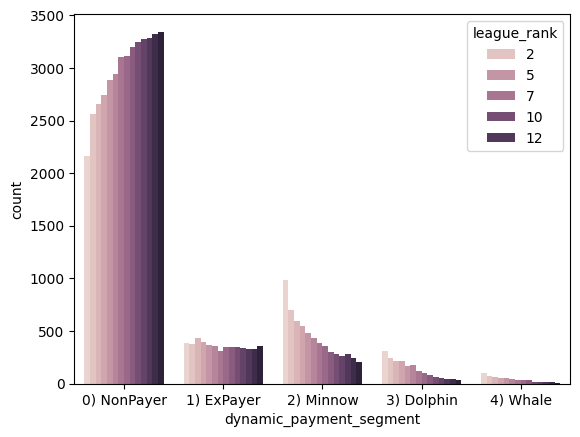

In [5]:
sns.countplot(df,x='dynamic_payment_segment',hue='league_rank')

C:\Users\Aleksa Kostic\AppData\Local\Temp\ipykernel_23424\4144095155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['registration_country'] = df_subset['registration_country'].cat.remove_unused_categories()


<Axes: xlabel='registration_country', ylabel='count'>

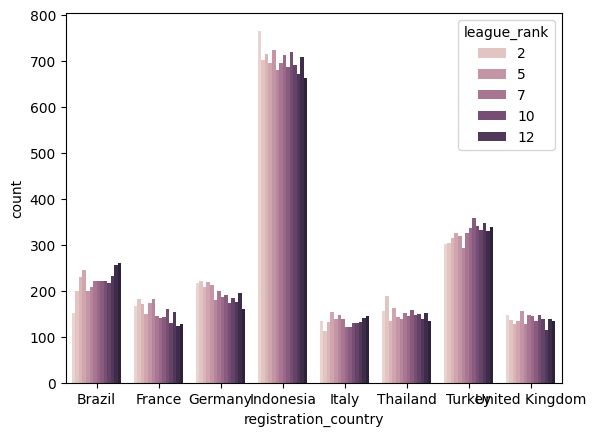

In [6]:
# sns.countplot(df[df['registration_country'].count()>1000],x='registration_country')
df_count = df['registration_country'].value_counts()/len(df)
df_subset = df[df["registration_country"].isin(df_count[df_count>0.03].index)]
df_subset['registration_country'] = df_subset['registration_country'].cat.remove_unused_categories()
# df.loc[df["registration_country"].isin(df_count[df_count<=0.03].index),'registration_country'] = "Other country"
sns.countplot(df_subset,x='registration_country',hue='league_rank')


C:\Users\Aleksa Kostic\AppData\Local\Temp\ipykernel_23424\1138277049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['registration_platform_specific'] = df_subset['registration_platform_specific'].cat.remove_unused_categories()


<Axes: xlabel='registration_platform_specific', ylabel='count'>

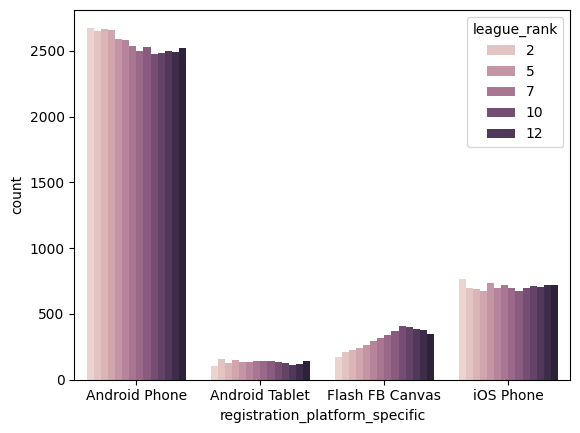

In [7]:
df_count = df['registration_platform_specific'].value_counts()/len(df)
df_subset = df[df["registration_platform_specific"].isin(df_count[df_count>0.03].index)]
df_subset['registration_platform_specific'] = df_subset['registration_platform_specific'].cat.remove_unused_categories()
# df.loc[df["registration_platform_specific"].isin(df_count[df_count<=0.03].index),'registration_platform_specific'] = "Other platform"
sns.countplot(df_subset,x='registration_platform_specific',hue='league_rank')

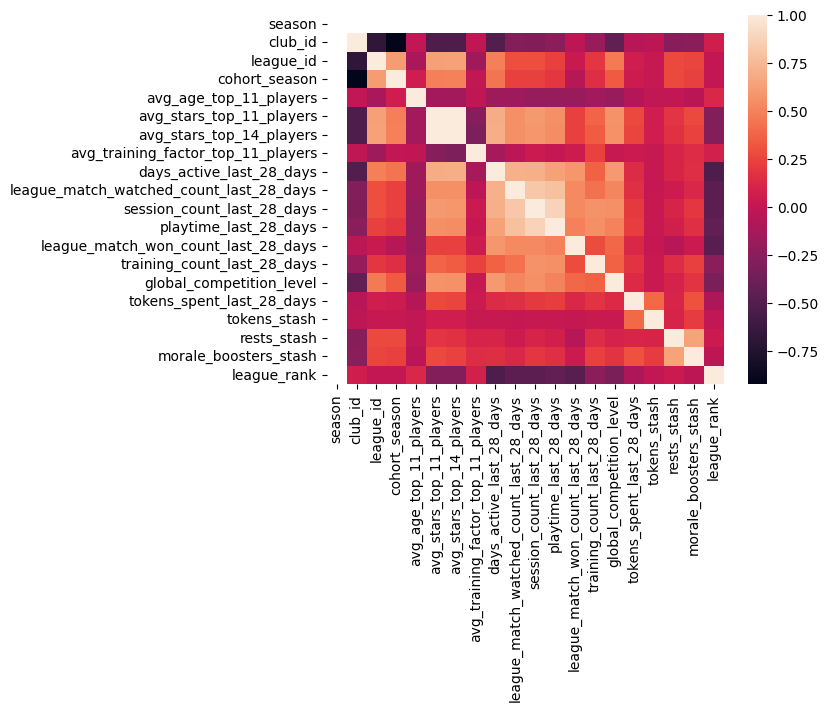

In [8]:
sns.heatmap(df.select_dtypes(include='number').corr());


In [9]:
df = df.drop('avg_stars_top_14_players',axis=1)

In [10]:
df = df.drop('registration_country',axis=1)
df = df.drop('dynamic_payment_segment',axis=1)
df = df.drop('registration_platform_specific',axis=1)

In [11]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(test_size=.1, n_splits=1, random_state = 4).split(df, groups=df['league_id'])

X_train_inds, X_test_inds = next(gss)

train_data= df.iloc[X_train_inds]
train_data = train_data.sort_values('league_id')
X_train = train_data.loc[:, ~train_data.columns.isin(['season', 'club_id', 'league_id','league_rank'])]
y_train = train_data.loc[:, train_data.columns.isin(['league_rank'])]

groups = train_data.groupby('league_id').size().to_frame('size')['size'].to_numpy()

test_data= df.iloc[X_test_inds]
test_data = test_data.sort_values('league_id')
groups_test = test_data.groupby('league_id').size().to_frame('size')['size'].to_numpy()

#We need to keep the id for later predictions
pred_test = test_data[['club_id', 'league_id']].copy(deep=True).set_index('club_id')
X_test = test_data.loc[:, ~test_data.columns.isin(['season', 'club_id', 'league_id','league_rank'])]
y_test = test_data.loc[:, test_data.columns.isin(['league_rank'])]
# y_test = test_data.loc[:, test_data.columns.isin(['club_id','league_rank'])].set_index('club_id')['league_rank']

In [26]:
import xgboost as xgb
model = xgb.XGBRanker(  
    # tree_method='gpu_hist',
    booster='gbtree',
    objective='rank:pairwise',
    random_state=10, 
    learning_rate=0.1,
    colsample_bytree=0.9, 
    eta=0.05, 
    max_depth=4, 
    n_estimators=120, 
    subsample=0.75,
    # lambdarank_pair_method="topk",
    lambdarank_pair_method = 'mean',
    lambdarank_num_pair_per_sample=13,
    # enable_categorical=True,
    verbosity=1,
    eval_metric=["ndcg"],
    )

model.fit(X_train.to_numpy(), 14-y_train.to_numpy()[:,0], group=groups, verbose=True,
          eval_group=[groups_test],
          eval_set=[(X_test.to_numpy(), 14-y_test.to_numpy()[:,0])],
          
          )
from sklearn.metrics import ndcg_score,mean_absolute_error
from scipy.stats import rankdata
pred1 = model.predict(X_test.to_numpy()).reshape(-1,14)
pred = rankdata(pred1, axis=1)-1
random_pre = np.repeat(np.arange(0,14),y_test.size//14)
np.random.shuffle(random_pre)
# (random_pre - y_test).abs().mean()
print(ndcg_score(2**((14-y_test.to_numpy()[:,0]).reshape(-1,14))-1,pred))
mean_absolute_error((14-y_test.to_numpy()[:,0]).reshape(-1,14),pred)




# pred_test['league_rank_pred'] = model.predict(X_test)
# ranking = pred_test.groupby('league_id',sort=False)['league_rank_pred'].apply(lambda x: 1+np.argsort(x).iloc[::-1]).droplevel('league_id')
# (ranking - (y_test)).abs().mean()

[0]	validation_0-ndcg:0.78959
[1]	validation_0-ndcg:0.81397
[2]	validation_0-ndcg:0.82000
[3]	validation_0-ndcg:0.82347
[4]	validation_0-ndcg:0.82618
[5]	validation_0-ndcg:0.82898
[6]	validation_0-ndcg:0.83199
[7]	validation_0-ndcg:0.83229
[8]	validation_0-ndcg:0.83544
[9]	validation_0-ndcg:0.83673
[10]	validation_0-ndcg:0.83711
[11]	validation_0-ndcg:0.83864
[12]	validation_0-ndcg:0.83886
[13]	validation_0-ndcg:0.83816
[14]	validation_0-ndcg:0.84053
[15]	validation_0-ndcg:0.84165
[16]	validation_0-ndcg:0.84071
[17]	validation_0-ndcg:0.83986
[18]	validation_0-ndcg:0.84096
[19]	validation_0-ndcg:0.84078
[20]	validation_0-ndcg:0.84199
[21]	validation_0-ndcg:0.84179
[22]	validation_0-ndcg:0.84248
[23]	validation_0-ndcg:0.84124
[24]	validation_0-ndcg:0.84209
[25]	validation_0-ndcg:0.84303
[26]	validation_0-ndcg:0.84260
[27]	validation_0-ndcg:0.84365
[28]	validation_0-ndcg:0.84623
[29]	validation_0-ndcg:0.84465
[30]	validation_0-ndcg:0.84672
[31]	validation_0-ndcg:0.84787
[32]	validation_0-

ValueError: Found input variables with inconsistent numbers of samples: [5544, 396]

In [1137]:
mean_absolute_error((y_test.to_numpy()[:,0].reshape(-1,14))-1,pred)


2.945738264787095

In [23]:
# model.score(X_test.to_numpy(), y_test.to_numpy()[:,0]-1)
# np.abs( pred- (y_test.to_numpy()[:,0]-1).reshape(-1,14)).mean()
# len(X_train_inds)
model.predict(X_test.to_numpy()).reshape(-1,14)
model.score(X_test.to_numpy(),y_test.to_numpy()[:,0]-1)


0.46088798494519795

In [1040]:
model.predict(X_test.to_numpy())[:14]
(pred1).reshape(-1,14)[0]
# np.tile(np.arange(14),y_test.size//14).reshape(-1,14)
np.argsort(pred1, axis=1).shape
np.take_along_axis(pred1,np.argsort(pred1, axis=1),axis=0)[0]

array([-2.1535003 ,  0.28354248,  0.19366542, -5.978395  , -1.9956807 ,
        1.2227894 ,  1.6435264 ,  0.5570239 ,  1.8877058 ,  0.2068491 ,
       -1.3122716 , -0.02755847, -1.9035444 , -2.819246  ], dtype=float32)

In [903]:
# list(zip(np.array(X_test.to_numpy()).reshape(396,14,-1),y_test.to_numpy().reshape(396,14)))[0]
dir(model)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_can_use_inplace_predict',
 '_check_feature_names',
 '_check_n_features',
 '_configure_fit',
 '_create_dmatrix',
 '_create_ltr_dmatrix',
 '_estimator_type',
 '_get_default_requests',
 '_get_iteration_range',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_get_type',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_evaluation_result',
 '_validate_data',
 '_validate_params',
 'apply',
 'base_score',
 'best_iteration',
 'best_score',
 'booster',
 'cal

In [871]:
len(X_test)/14

396.0

In [846]:
def eval_set(X,Y):
    for (_,x),(_,y) in zip(X.groupby('league_id'),Y.groupby('league_id')):
        yield x.loc[:, ~x.columns.isin(['league_id'])].values.tolist(),y.loc[:, ~y.columns.isin(['league_id'])].values[:,0].tolist()
list(eval_set(X_test,y_test))[0][1][0]
X_train.columns
# test_data['league_id']
# test_data.loc[:, ~test_data.columns.isin(['season', 'club_id', 'league_id',])]
# list(y_test.iterrows())[0]

Index(['cohort_season', 'avg_age_top_11_players', 'avg_stars_top_11_players',
       'avg_training_factor_top_11_players', 'days_active_last_28_days',
       'league_match_watched_count_last_28_days', 'session_count_last_28_days',
       'playtime_last_28_days', 'league_match_won_count_last_28_days',
       'training_count_last_28_days', 'global_competition_level',
       'tokens_spent_last_28_days', 'tokens_stash', 'rests_stash',
       'morale_boosters_stash'],
      dtype='object')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

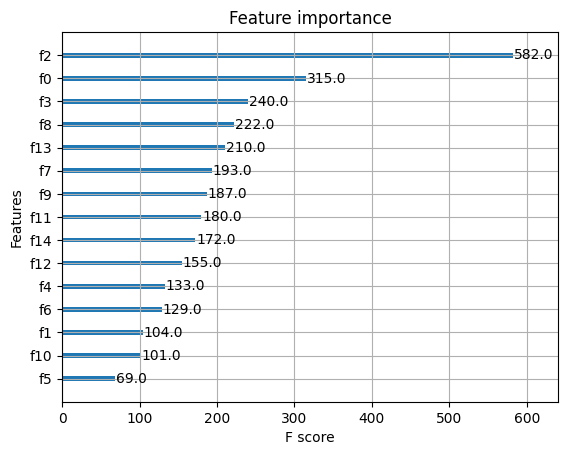

In [1093]:
xgb.plot_importance(model)


4.861480075901328

In [143]:
predictions

league_id  club_id 
2912348    6042825      [-1.0309665]
2910371    14187773     [-0.0888659]
2912548    5990762     [-0.59953177]
2911299    14223642     [-1.1886306]
2910371    11709507     [0.42257142]
                           ...      
2912392    12376486     [-1.0522507]
2908747    14335735     [0.09262134]
2910758    13830216     [0.65053016]
2906913    14309556     [-1.6864183]
2905985    14455654    [0.024861218]
Length: 22134, dtype: object

In [549]:

# ranking = ranking.reset_index().set_index('club_id')
ranking
# league_groupby['club_id']
# league_groupby.apply(lambda x: np.argsort(x['league_rank_pred']))

club_id
6025795      5
5965356     10
6028826      7
6020086      1
5963972     11
            ..
14206445     3
13495155     1
13690989     6
13973545    13
13967285    11
Name: league_rank_pred, Length: 22134, dtype: int64

In [566]:
a = pred_test.groupby('league_id',sort=False)['league_rank_pred'].apply(lambda x: np.argsort(x)[::-1]+1)
b = pred_test.groupby('league_id',sort=False)['league_rank_pred'].apply(lambda x: np.argsort(x)+1)
aa = np.argsort(list(pred_test.groupby('league_id',sort=False)['league_rank_pred'])[0][1])
print(list(pred_test.groupby('league_id',sort=False)['league_rank_pred'])[0][1])
14-np.argsort(list(pred_test.groupby('league_id',sort=False)['league_rank_pred'])[0][1])

club_id
6042825    -1.083650
6048252    -1.414567
6019629     0.283274
6042045     0.182188
12195809    0.052350
14388036   -0.376572
5991530     0.327654
5994242    -0.387798
10621637    0.746463
5963972     0.252529
6020086     0.320670
6028826    -0.847067
5965356     0.294484
6025795     0.139350
Name: league_rank_pred, dtype: float32


club_id
6042825     13
6048252     14
6019629      3
6042045      7
12195809     9
14388036    10
5991530      1
5994242     11
10621637     5
5963972     12
6020086      2
6028826      4
5965356      8
6025795      6
Name: league_rank_pred, dtype: int64

In [518]:
y_test[aa.index]

club_id
6025795     11
5965356      6
6028826      3
6020086      7
5963972      9
10621637    10
5994242      4
5991530     13
14388036    12
12195809    14
6042045      8
6019629      5
6048252      1
6042825      2
Name: league_rank, dtype: int64

In [488]:
(y_test[aa.index]-aa).abs()

club_id
6025795      2
5965356      5
6028826     10
6020086      0
5963972      6
10621637     0
5994242      0
5991530      1
14388036     7
12195809     8
6042045      0
6019629      7
6048252      0
6042825      0
dtype: int64

In [594]:
pred1 = np.random.permutation(np.arange(1,15))
print(np.abs(np.arange(1,15)-pred1[::-1]).mean(),np.abs(np.arange(1,15)-pred1).mean())

5.285714285714286 3.857142857142857


In [750]:
# # y_test = test_data.loc[:, test_data.columns.isin(['club_id','league_id','league_rank'])].set_index(['league_id','club_id']).sort_index()
random_pre = np.repeat(np.arange(1,15),y_test.size//14)
np.random.shuffle(random_pre)
(random_pre - y_test).abs().mean()

4.648504563115568

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14])

In [139]:

X_test.groupby(['league_id','club_id'],sort=False).apply(lambda x:x)

,,,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_training_factor_top_11_players,days_active_last_28_days,league_match_watched_count_last_28_days,session_count_last_28_days,playtime_last_28_days,registration_country,registration_platform_specific,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash
league_id,club_id,,,,,,,,,,,,,,,,,,,,,
2912348,6042825,0,6042825,2912348,2) Minnow,134,25,5.255151,1.778801,25,10,271,81281642,Portugal,Flash FB Canvas,24,435,11.0,598,245,186,818
2910371,14187773,3,14187773,2910371,0) NonPayer,2,21,4.164848,0.551904,12,0,18,12143308,Malaysia,Android Phone,11,22,2.0,41,43,213,126
2912548,5990762,5,5990762,2912548,0) NonPayer,104,23,5.165491,0.508691,28,6,113,52316063,Italy,iOS Phone,18,66,3.0,117,32,52,28
2911299,14223642,6,14223642,2911299,2) Minnow,2,23,5.331697,0.260603,25,11,176,115438831,Cambodia,iOS Phone,21,105,6.0,313,19,48,27
2910371,11709507,7,11709507,2910371,0) NonPayer,16,24,3.881236,0.587786,1,1,1,2438713,Indonesia,Android Phone,12,2,0.0,9,25,97,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912392,12376486,55305,12376486,2912392,0) NonPayer,11,25,4.806133,0.489918,28,10,162,64578060,Jordan,Android Phone,17,81,1.0,52,28,17,10
2908747,14335735,55306,14335735,2908747,0) NonPayer,1,23,4.565115,0.421821,3,0,5,2171933,France,iOS Tablet,2,9,0.0,90,40,279,225
2910758,13830216,55308,13830216,2910758,0) NonPayer,4,25,4.470218,0.323581,0,0,0,0,France,iOS Phone,4,0,0.0,0,18,1016,38


In [96]:


from functools import partial
from sklearn.pipeline import FunctionTransformer


numeric_features_standard = ['avg_age_top_11_players', 'avg_stars_top_11_players',
       'avg_stars_top_14_players', 'avg_training_factor_top_11_players',
       'days_active_last_28_days', 'league_match_watched_count_last_28_days',
       'session_count_last_28_days',
       'league_match_won_count_last_28_days',
       'global_competition_level']
numeric_features_robust = ["cohort_season", "playtime_last_28_days",
                           "training_count_last_28_days",
                           "tokens_spent_last_28_days","tokens_stash"]
standard_scaler = StandardScaler()
robust_scaler= Pipeline(
    steps=[
        ("robust_scaler", RobustScaler(quantile_range=(25,75))),
        ("clip", FunctionTransformer(partial(np.clip,a_min=-4,a_max=4))),
    ]
)
categorical_features = ["dynamic_payment_segment", 
                        # "registration_country",
                        "registration_platform_specific",
                        ]
categorical_transformer = OneHotEncoder(handle_unknown="ignore",sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_standard", standard_scaler, numeric_features_standard),
        ("num_robust", robust_scaler, numeric_features_robust),

        # ("cat", categorical_transformer, categorical_features),
    ]
)


In [125]:
df = df.fillna(0)
preprocessor.set_output(transform='pandas')
df_train, df_val = train_test_split(df, test_size=0.3, random_state=0)
pd.options.display.float_format = '{:.5f}'.format
preprocessor.fit_transform(df_train).describe()

c:\Projects\NChallenge2023\env\lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


,num_standard__avg_age_top_11_players,num_standard__avg_stars_top_11_players,num_standard__avg_stars_top_14_players,num_standard__avg_training_factor_top_11_players,num_standard__days_active_last_28_days,num_standard__league_match_watched_count_last_28_days,num_standard__session_count_last_28_days,num_standard__league_match_won_count_last_28_days,num_standard__global_competition_level,num_robust__cohort_season,num_robust__playtime_last_28_days,num_robust__training_count_last_28_days,num_robust__tokens_spent_last_28_days,num_robust__tokens_stash
count,38719.00000,38719.00000,38719.00000,38719.00000,38719.00000,38719.00000,38719.00000,38719.00000,38719.00000,38719.00000,38719.00000,38719.00000,38719.00000,38719.00000
mean,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.76524,0.55601,0.51931,0.38650,0.49745
std,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.46846,1.09372,1.05572,1.05429,1.21087
min,-2.59154,-2.25383,-2.21675,-10.65676,-1.04386,-0.61277,-0.62307,-1.93449,-0.94194,-0.20000,-0.16682,-0.17460,-0.35514,-4.00000
25%,-0.77598,-0.70224,-0.71823,-0.59209,-0.95941,-0.61277,-0.61328,-0.68857,-0.94194,-0.13333,-0.16472,-0.17460,-0.35514,-0.29032
50%,-0.32209,-0.04331,-0.02837,-0.12499,-0.45274,-0.61277,-0.46658,-0.06560,-0.58936,0.00000,0.00000,0.00000,0.00000,0.00000
75%,0.58569,0.56796,0.57664,0.36915,1.23615,0.23227,0.24739,0.71310,0.82099,0.86667,0.83528,0.82540,0.64486,0.70968
max,4.21680,12.99670,11.55616,26.09587,1.32059,3.78144,12.50224,2.11476,2.93650,4.00000,4.00000,4.00000,4.00000,4.00000


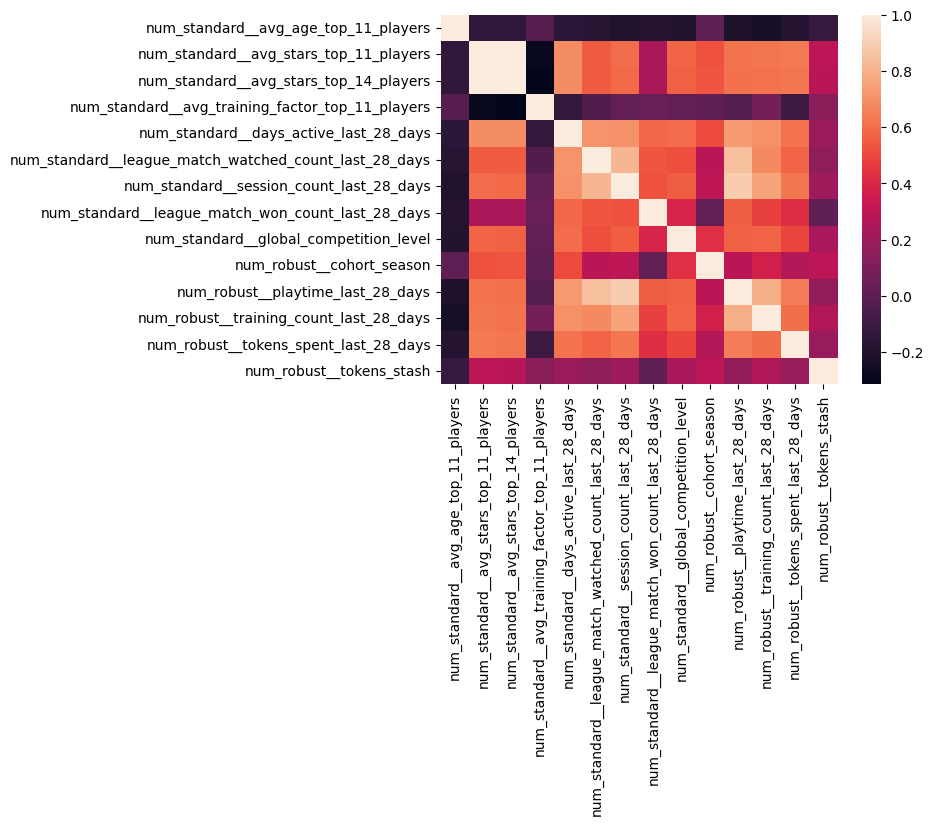

In [98]:
sns.heatmap(preprocessor.fit_transform(df_train).select_dtypes(include='number').corr());

In [128]:


from sklearn.linear_model import LinearRegression

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression)]
)
# clf.fit(df_train.iloc[:,:-2],df_train.iloc[:,-2])
test = OrderedModel(preprocessor.fit_transform(df_train).iloc[:,-2],
             preprocessor.fit_transform(df_train).iloc[:,:-2])
res_log = test.fit(method='bfgs')
print(res_log.summary())

Optimization terminated successfully.
         Current function value: 3.725664
         Iterations: 231
         Function evaluations: 233
         Gradient evaluations: 233


KeyboardInterrupt: 